 # Titanic - Machine Learning from Disaster
 Authour Sean Hansen-Romu

After completeing several courses in Data Science I want to practice and test my skills.

**Competition :** Kaggles first tutorial challenge. The competition's goal is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

### Goal

It is my job to predict if the passenger survived the sinking off the Titanic or not. For each PassengerID, I provide a binary prediction 0 or 1 if the passenger died or survived in the following compition submission format: 

#### File Format
418 entires plus header row. 
```python
PassengerId, Survived
892, 0
893, 1
984, 0
Etc.
```

We will start by importing any nessary libraries here and the data as well as the data we want to predict with

### Import Libraires

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats 
import statsmodels.api as sm
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import the Data
Load the dataset into a Jypter Notebook

In [2]:
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

.\gender_submission.csv
.\submission.csv
.\test.csv
.\Titanic Kaggle.ipynb
.\train.csv
.\.ipynb_checkpoints\Titanic Kaggle-checkpoint.ipynb


In [3]:
train_data=pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data=pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Database values

Become familiar with the data set 

The following describes the dataset variables:
* survival - survial (0 = No, 1 = Yes)
* pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex - gender (male or female)
* Age - Age in years, if fractional is less than 1. If age is estimated is in the form of xx.5
* sibsp - # of siblings / spouse aboard the Titanic
* parch - # of parents / children aboard the Titanic
* ticket - Ticket number
* fare - Passener fare
* cabin - Cabin number
* embark - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southamptopn)

## Some Data Wrangling
The data has NaN and I want to also using one-hot encoding on Sex and Embarked

In [5]:
print(train_data.isna().sum())
print("")
print("")
print(test_data.isna().sum())

combined_data = pd.concat([train_data,test_data],ignore_index=True)
combined_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
combined_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### I have to deal with missing data

In [7]:
trainEmbarked = train_data['Embarked'].value_counts()
print(trainEmbarked)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


I can perform Frequency Category Imputation to assigne NaN values of Embarked as S. Note using only data from the train_data here to prevent leakage of data from test data, into the training data.

In [8]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")
test_data["Embarked"] = test_data["Embarked"].fillna("S")

Next is trying to deal with age. We can use the honorific to get estimates for age in the different categrories.

In [9]:
train_data['Honorific']=0
for i in train_data:
    train_data['Honorific']=train_data.Name.str.extract('([A-Za-z]+)\.')

test_data['Honorific']=0
for i in test_data:
    test_data['Honorific']=test_data.Name.str.extract('([A-Za-z]+)\.')

In [10]:
pd.crosstab(train_data.Honorific,train_data.Sex).T.style.background_gradient(cmap='plasma')

Honorific,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [11]:
pd.crosstab(test_data.Honorific,test_data.Sex).T.style.background_gradient(cmap='plasma')

Honorific,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


Looking up the meanings on Wikipedia.\
Mlle is an alternative tradiaitonal french honorific an unmarried woman.\
Mme is an alternative tradiaitonal french honorific an unmarried woman.\
Capt is captian, and Col is for colonel, both military honorifics.\
Contess is married female nobility.\
Don and Donna are spanish noblity.\
Jonkheer is unmarried man of Dutch royalty.\
Lady is unmarried nobility.\
Major is militrary.\
Master is unmarried male nobility.\
Rev is short for reverand and is a ecclesiastical title.\
Sir is a male nobility title.

#### Let us condense this down. Assuming military and clergy are roughly equivalent to nobility in station. 

In [12]:
train_data['Honorific'].replace(['Capt', 'Col',  'Countess','Don',  'Dr',   'Jonkheer','Lady', 'Major','Mlle','Mme', 'Ms',  'Rev',  'Sir','Dona'],
                                ['Noble','Noble','Noble',  'Noble','Noble','Noble',   'Noble','Noble','Miss','Miss','Miss','Noble','Noble','Noble']
                             ,inplace=True)
train_data.groupby('Honorific')['Age'].mean()


Honorific
Master     4.574167
Miss      21.860000
Mr        32.368090
Mrs       35.898148
Noble     45.545455
Name: Age, dtype: float64

In [13]:
train_data.loc[(train_data.Age.isnull())&(train_data.Honorific=='Master'),'Age']=4.57
train_data.loc[(train_data.Age.isnull())&(train_data.Honorific=='Miss'),'Age']=21.86
train_data.loc[(train_data.Age.isnull())&(train_data.Honorific=='Mr'),'Age']=32.37
train_data.loc[(train_data.Age.isnull())&(train_data.Honorific=='Mrs'),'Age']=35.90
train_data.loc[(train_data.Age.isnull())&(train_data.Honorific=='Noble'),'Age']=45.54

Check if there is missing ages in the training data

In [14]:
train_data.Age.isnull().any()

False

We use the mean imputation calculated using the training set for the missing values of age in the test data set.

In [15]:
test_data['Honorific'].replace(['Capt', 'Col',  'Countess','Don',  'Dr',   'Jonkheer','Lady', 'Major','Mlle','Mme', 'Ms',  'Rev',  'Sir', 'Dona'],
                                ['Noble','Noble','Noble',  'Noble','Noble','Noble',   'Noble','Noble','Miss','Miss','Miss','Noble','Noble','Noble']
                             ,inplace=True)
test_data.loc[(test_data.Age.isnull())&(test_data.Honorific=='Master'),'Age']=4.57
test_data.loc[(test_data.Age.isnull())&(test_data.Honorific=='Miss'),'Age']=21.86
test_data.loc[(test_data.Age.isnull())&(test_data.Honorific=='Mr'),'Age']=32.37
test_data.loc[(test_data.Age.isnull())&(test_data.Honorific=='Mrs'),'Age']=35.90
test_data.loc[(test_data.Age.isnull())&(test_data.Honorific=='Noble'),'Age']=45.54

Test to see if there is a missing value for age in the test set.

In [16]:
test_data.Age.isnull().any()

False

There is only 1 missing data set for Fare. Let us remove it. 

In [17]:
train_data.groupby(['Honorific','Pclass'])['Fare'].mean()

Honorific  Pclass
Master     1         117.802767
           2          27.306022
           3          28.177232
Miss       1         120.625084
           2          20.182500
           3          15.248043
Mr         1          68.034385
           2          19.252564
           3          11.299762
Mrs        1          93.170636
           2          23.496139
           3          18.233529
Noble      1          48.035280
           2          16.796875
Name: Fare, dtype: float64

In [18]:
test_data.loc[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [19]:
test_data.loc[(test_data.Fare.isnull())&(test_data.Honorific=='Mr'),'Fare']=11.30

We simply drop Cabin from the analysis since there is not enough data to interpolate meaningfully. 

We finally handled all NaN values!

## Understanding the Data

I will attempt a cursory statistical overveiw to get a feeling for the data

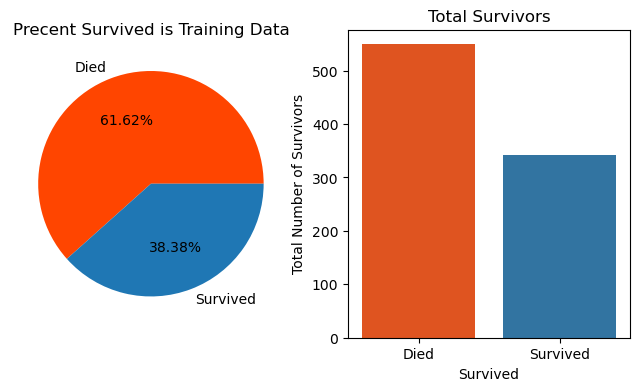

In [20]:
f,ax=plt.subplots(1,2,figsize=(8,4))
survivor_count = train_data['Survived'].value_counts()
survivor_count.plot.pie(labels=['Died', 'Survived'],autopct='%0.2f%%',ax=ax[0],colors=['orangered', 'tab:blue'])
#patches, text = plt.pie(survivor_count)
ax[0].set_title('Precent Survived is Training Data')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=train_data, ax=ax[1], palette=['orangered','tab:blue'])
ax[1].set_title('Total Survivors')
ax[1].set_ylabel('Total Number of Survivors')
ax[1].set_xticklabels(['Died','Survived'])
plt.show()

In [21]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


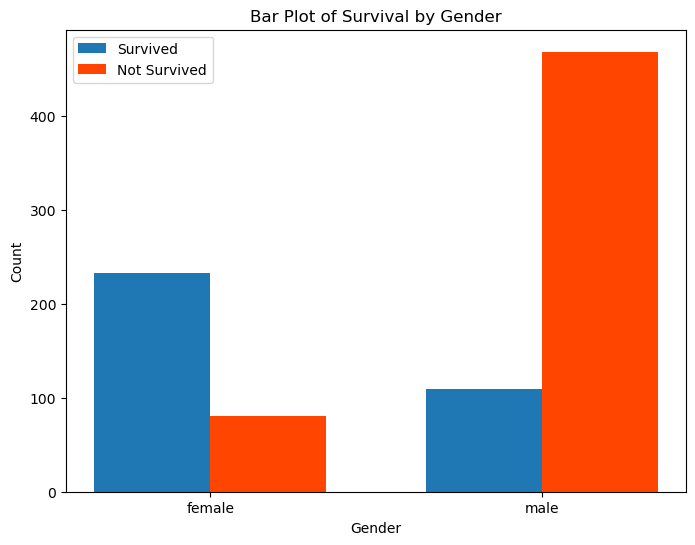

In [22]:
counts = train_data.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
categories = counts['Sex'].unique()
survived_values = counts[counts['Survived'] == 1]['Count']
not_survived_values = counts[counts['Survived'] == 0]['Count']
bar_width = 0.35
index = range(len(categories))
plt.bar(index, survived_values, width=bar_width, label='Survived', color='tab:blue')
plt.bar([i + bar_width for i in index], not_survived_values, width=bar_width, label='Not Survived', color='orangered')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Survival by Gender')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()
plt.show()

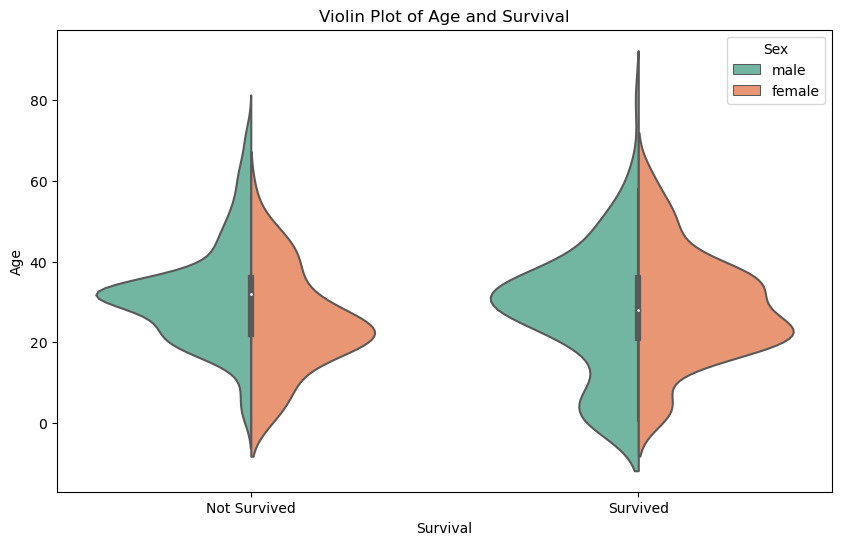

In [23]:
# Create a violin plot for age and survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=train_data, hue='Sex', split=True, palette='Set2')
plt.title('Violin Plot of Age and Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Age')

# Show the plot
plt.show()

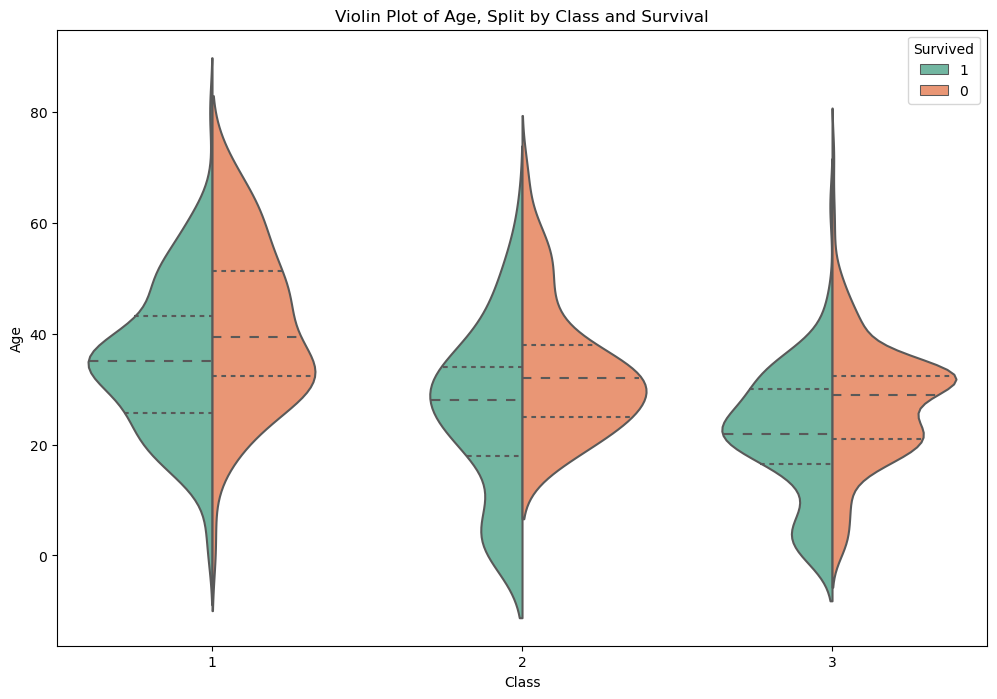

In [24]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True, inner='quartile', palette='Set2', hue_order=[1, 0])
plt.title('Violin Plot of Age, Split by Class and Survival')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

<Figure size 1600x800 with 0 Axes>

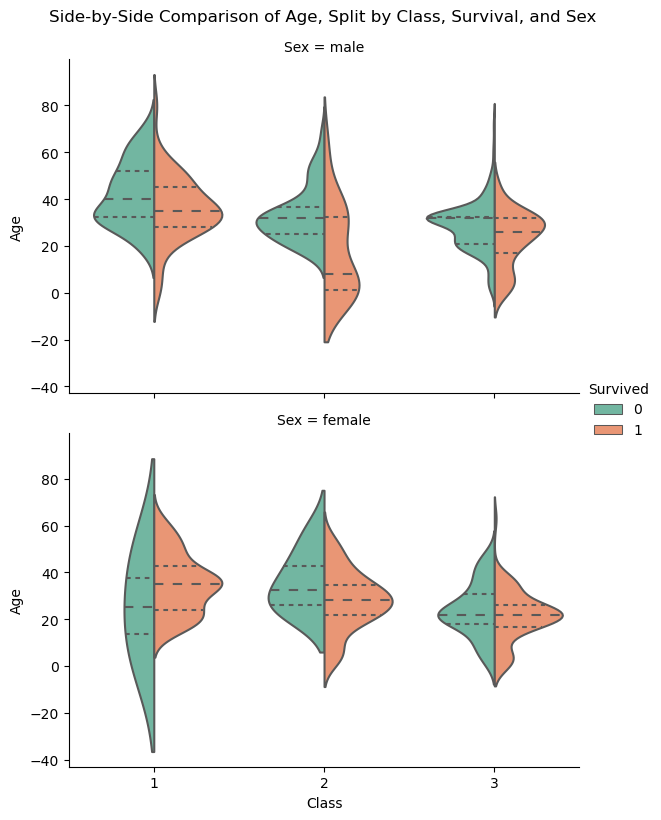

In [25]:
plt.figure(figsize=(16, 8))

# Create a side-by-side comparison of 'survived' and 'not survived' for each combination of 'sex' and 'class'
sns.catplot(x='Pclass', y='Age', hue='Survived', row='Sex', data=train_data, kind='violin', split=True, inner='quartile', palette='Set2', height=4, aspect=1.5)

# Set labels and title
plt.suptitle('Side-by-Side Comparison of Age, Split by Class, Survival, and Sex', y=1.02)
plt.xlabel('Class')
plt.ylabel('Age')

# Show the plot
plt.show()

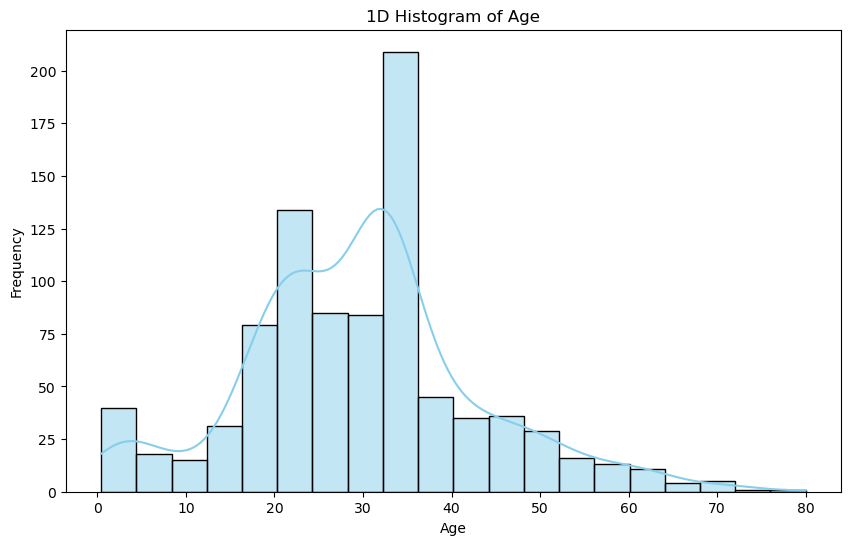

In [26]:
plt.figure(figsize=(10, 6))

# Create a 1D histogram using Seaborn
sns.histplot(train_data['Age'], bins=20, kde=True, color='skyblue')

# Set labels and title
plt.title('1D Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

I am starting to understand the data a bit more. I am now move onto using Machine learning to calculate the surviver.

First we get rid of extra data.

In [27]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_data['Honorific'].replace(['Mr','Mrs','Miss','Master','Noble'],[0,1,2,3,4],inplace=True)

In [28]:
train_data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
train_data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Honorific
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,2


Do the same transformation for the test data.

In [29]:
test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_data['Honorific'].replace(['Mr','Mrs','Miss','Master','Noble'],[0,1,2,3,4],inplace=True)

In [30]:
test_data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
test_data.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Honorific
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,2,0


# ML algorithms

I will be implementing the following ML algoritims:

* Logisitc Regression (possible)
* Naive Bayes
* Support Vector Machines
* K-Nearest Neighbors for classification
* Random Forest
* Artifical Neutral Networks

In [31]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.model_selection import train_test_split # splitting the data
scaler = StandardScaler()


train,test=train_test_split(train_data,test_size=0.3,random_state=0,stratify=train_data['Survived'])
train_X=train[train.columns[2:]]
train_X=scaler.fit_transform(train_X)
train_Y=train[train.columns[1]]
test_X=test[test.columns[2:]]
test_X=scaler.transform(test_X)
test_Y=test[test.columns[1]]
X=train_data[train_data.columns[2:]]
X=scaler.transform(X)
Y=train_data['Survived']

FinalTrain_X=train_data[train.columns[2:]]
FinalTrain_X=scaler.transform(FinalTrain_X)
FinalTrain_Y=train_data[train.columns[1]]

KraggleTest = test_data[test_data.columns[1:]]
KraggleTest = scaler.transform(KraggleTest)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline


pipeline_LR = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='saga', max_iter=10000))
])

pipeline_LR.fit(train_X, train_Y)
prediction_LR=pipeline_LR.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_LR,test_Y))

The accuracy of the Logistic Regression is 0.832089552238806


## Naive Bayes Classification

In [34]:
from sklearn.naive_bayes import GaussianNB 
pipeline_NB = Pipeline([
    ('classifier', GaussianNB())
])
pipeline_NB.fit(train_X,train_Y)
prediction_NB=pipeline_NB.predict(test_X)
print('The accuracy of the Naive Bayes is',metrics.accuracy_score(prediction_NB,test_Y))

The accuracy of the Naive Bayes is 0.8171641791044776


## Support Vector Machine

In [35]:
from sklearn import svm
pipeline_SVM = Pipeline([
    ('classifier', svm.SVC(kernel='rbf',C=1,gamma=0.1))
])
pipeline_SVM.fit(train_X,train_Y)
prediction_SVM=pipeline_SVM.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction_SVM,test_Y))

Accuracy for rbf SVM is  0.8432835820895522


## K-nearest Neighbours for classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_KNN = Pipeline([
    ('classifier',KNeighborsClassifier())
])
pipeline_KNN.fit(train_X,train_Y)
prediction_knn=pipeline_KNN.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction_knn,test_Y))

The accuracy of the KNN is 0.8470149253731343


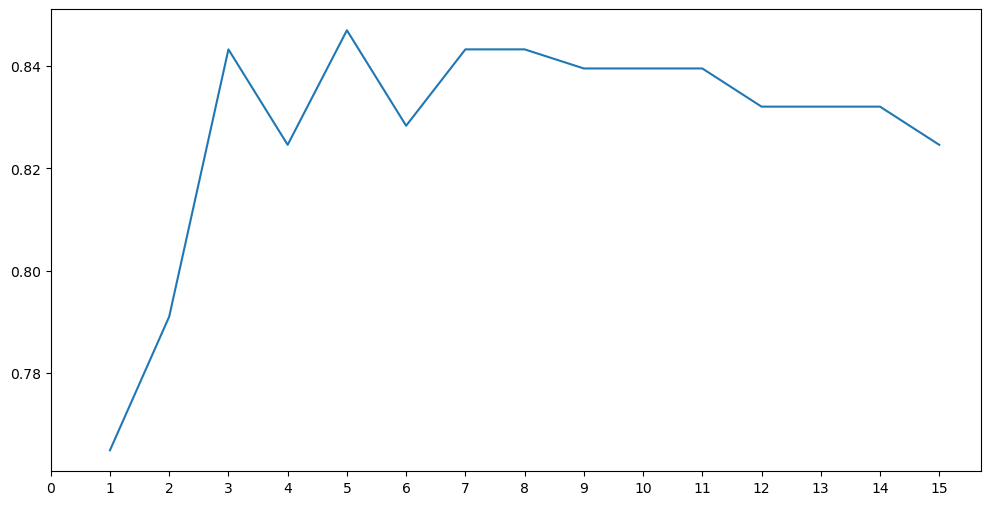

Accuracies for different values of n are: [0.7649253731343284, 0.7910447761194029, 0.8432835820895522, 0.8246268656716418, 0.8470149253731343, 0.8283582089552238, 0.8432835820895522, 0.8432835820895522, 0.8395522388059702, 0.8395522388059702, 0.8395522388059702, 0.832089552238806, 0.832089552238806, 0.832089552238806, 0.8246268656716418] with the max value as  0.8470149253731343


In [37]:
a_index=list(range(1,16))
a=[]
x=list(range(16))
for i in a_index:
    pipeline_KNN = Pipeline([
        ('classifier',KNeighborsClassifier(n_neighbors=i))
    ])
    pipeline_KNN.fit(train_X,train_Y)
    prediction=pipeline_KNN.predict(test_X)
    a.append(metrics.accuracy_score(prediction,test_Y))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a,'with the max value as ',max(a))

## Machine Model: Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RF= Pipeline([
        ('classifier',RandomForestClassifier(n_estimators=100))
])

pipeline_RF.fit(train_X,train_Y)
prediction_RF=pipeline_RF.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction_RF,test_Y))

The accuracy of the Random Forests is 0.832089552238806


## Artifical Neutral Network

In [39]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-12,
                    hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)
model.fit(train_X, train_Y)
prediction_ANN=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction_ANN,test_Y))

The accuracy of the Decision Tree is 0.8208955223880597


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction_DecisionTree=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction_DecisionTree,test_Y))

The accuracy of the Decision Tree is 0.7985074626865671


In [41]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=8) # k=8, split the data into 8 equal parts

Mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','Artifical Neural Network']
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=5),
        DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=100),
        MLPClassifier(solver='lbfgs', alpha=1e-12,
                    hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    Mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
result_table=pd.DataFrame({'CV Mean':Mean,'Std':std},index=classifiers)       
result_table

,CV Mean,Std
Linear Svm,0.786700,0.017915
Radial Svm,0.828296,0.028475
Logistic Regression,0.802455,0.025134
KNN,0.809282,0.025858
Decision Tree,0.777862,0.035294
Naive Bayes,0.791295,0.015346
Random Forest,0.810378,0.026246
Artifical Neural Network,0.809162,0.043516


<function matplotlib.pyplot.show(close=None, block=None)>

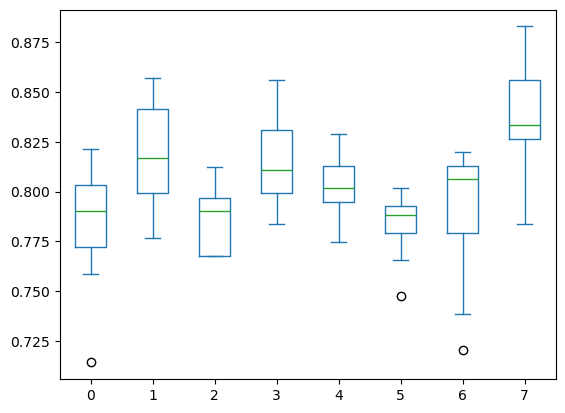

In [42]:
boxdata =pd.DataFrame(accuracy,index= [classifiers])
boxdata.plot.box()
plt.show

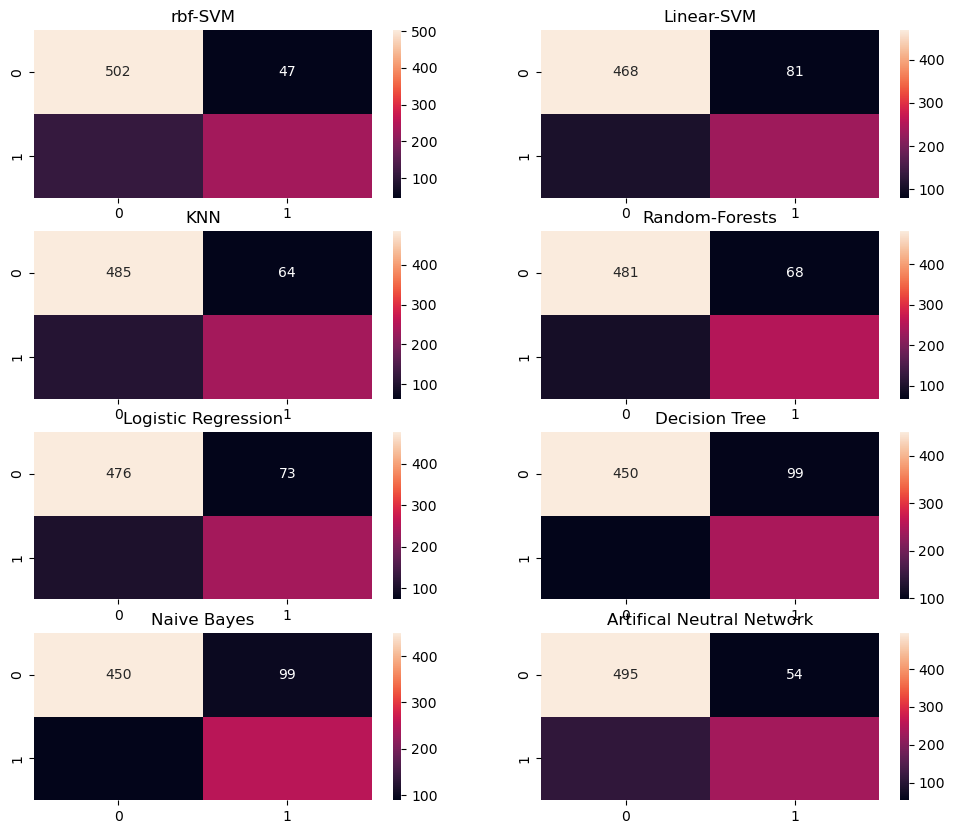

In [43]:
f,ax=plt.subplots(4,2,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[3,0],annot=True,fmt='2.0f')
ax[3,0].set_title('Naive Bayes')
y_pred = cross_val_predict(MLPClassifier(solver='lbfgs', alpha=1e-12,
                    hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000),X,Y,cv=8)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[3,1],annot=True,fmt='2.0f')
ax[3,1].set_title('Artifical Neutral Network')
plt.show()

## We choose the highest averge accuarcy on the cross validation

This choice happends to be the rfb State Vector Machine.

In [48]:
kfold = KFold(n_splits=8) # k=8, split the data into 8 equal parts

Mean=[]
accuracy=[]
std=[]
classifiers=['Radial Svm1','Radial Svm2','Radial Svm3','Radial Svm4','Radial Svm5','Radial Svm6','Radial Svm7','Radial Svm8']
models=[svm.SVC(kernel='rbf',C=1.1,gamma=0.11,class_weight='balanced'),
        svm.SVC(kernel='rbf',C=1.2,gamma=0.12,class_weight='balanced'),
        svm.SVC(kernel='rbf',C=1.3,gamma=0.13,class_weight='balanced'),
        svm.SVC(kernel='rbf',C=1.4,gamma=0.14,class_weight='balanced'),
        svm.SVC(kernel='rbf',C=0.5,gamma=0.15,class_weight='balanced'),
        svm.SVC(kernel='rbf',C=0.8,gamma=0.16,class_weight='balanced'),
        svm.SVC(kernel='rbf',C=0.9,gamma=0.17,class_weight='balanced'),
        svm.SVC(kernel='rbf',C=1.0,gamma=0.18,class_weight='balanced')]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    Mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
result_table=pd.DataFrame({'CV Mean':Mean,'Std':std},index=classifiers)       
result_table
accuracy

[array([0.8125    , 0.875     , 0.78571429, 0.84684685, 0.81981982,
        0.78378378, 0.81981982, 0.86486486]),
 array([0.80357143, 0.875     , 0.77678571, 0.84684685, 0.81981982,
        0.78378378, 0.81981982, 0.86486486]),
 array([0.80357143, 0.86607143, 0.77678571, 0.85585586, 0.81981982,
        0.78378378, 0.81981982, 0.86486486]),
 array([0.78571429, 0.86607143, 0.76785714, 0.85585586, 0.81981982,
        0.78378378, 0.81981982, 0.84684685]),
 array([0.8125    , 0.875     , 0.78571429, 0.83783784, 0.81981982,
        0.78378378, 0.81981982, 0.86486486]),
 array([0.80357143, 0.875     , 0.77678571, 0.84684685, 0.81981982,
        0.78378378, 0.81981982, 0.86486486]),
 array([0.79464286, 0.86607143, 0.76785714, 0.84684685, 0.81981982,
        0.78378378, 0.81981982, 0.83783784]),
 array([0.77678571, 0.86607143, 0.76785714, 0.85585586, 0.81981982,
        0.78378378, 0.81981982, 0.82882883])]

<function matplotlib.pyplot.show(close=None, block=None)>

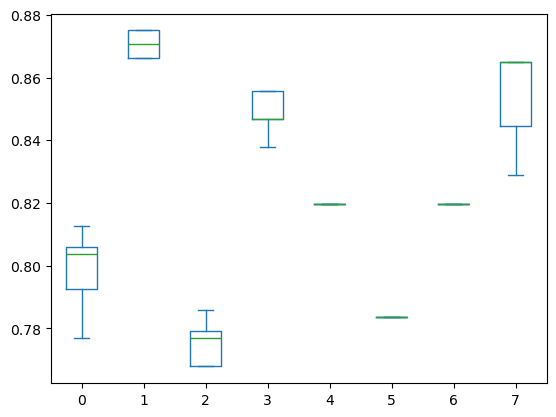

In [45]:
boxdata =pd.DataFrame(accuracy,index= [classifiers])
boxdata.plot.box()
plt.show

In [46]:
pipeline_SVM = Pipeline([
    ('classifier', svm.SVC(kernel='rbf',C=1,gamma=0.1))
])
pipeline_SVM.fit(FinalTrain_X,FinalTrain_Y)
prediction_SVM=pipeline_SVM.predict(KraggleTest)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction_SVM})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
